In [ ]:
#!pip install geopandas
#!pip install descartes
#!pip install plotly

In [ ]:
from urllib.request import urlopen
import json
#with urlopen('https://neo4j-datasets-public.s3-us-west-2.amazonaws.com/data/missoula.geojson') as response:
#    counties = json.load(response)
with open('../data/missoula.geojson') as json_file:
    counties = json.load(json_file)

import pandas as pd
df = pd.read_csv("../data/missoula.csv") #dtype={"fips": str}

import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=counties, locations='id', color='TotalValue',
                           color_continuous_scale="Viridis", 
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'TotalValue':'Total Value'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [5]:
import json

In [8]:
with open('../data/missoula.geojson') as json_file:
    data = json.load(json_file)

In [21]:
import csv

with open('../data/missoula.csv', mode='w') as csv_file:
    fieldnames = ['id', 'TotalValue']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for w in data['features'][:100]:
        if w['id']:
            writer.writerow({'id': w['id'], 'TotalValue': w['properties']['TotalValue']})

In [25]:
import geopandas

In [26]:
plots = geopandas.read_file('../data/missoula.geojson')

In [38]:
plots.head()

,id,COUNTYCD,GISAcres,TaxYear,PropertyID,Assessment,Township,Range,Section_,LegalDescr,...,OwnerAddre,OwnerAdd_1,OwnerAdd_2,OwnerCity,OwnerState,OwnerZipCo,CareOfTaxp,SHAPE_Leng,SHAPE_Area,geometry
0,04197831101010000,4,236.597109,2019,377580,0007002028,11 N,17 W,31,"S31, T11 N, R17 W, C.O.S. PLAT C, PARCEL 004, ...",...,ATTN: LANDS,24 FORT MISSOULA RD,None,MISSOULA,MT,59804-7203,None,4761.043501,9.574745e+05,POLYGON ((-113.7729638836716 46.65818409539637...
1,04197634202030000,4,6.749431,2019,369987,0005842704,11 N,19 W,34,"S34, T11 N, R19 W, C.O.S. 6079, PARCEL 4, ACRE...",...,23725 HUSON RD,None,None,HUSON,MT,59846-8704,None,777.959641,2.731398e+04,POLYGON ((-113.9660682375986 46.66092388804909...
2,04197634202020000,4,4.415613,2019,1440104,0004555558,11 N,19 W,34,"S34, T11 N, R19 W, C.O.S. 6079, PARCEL 3",...,23725 HUSON RD,None,None,HUSON,MT,59846-8704,None,538.669500,1.786935e+04,POLYGON ((-113.9644180361594 46.66091827676483...
3,04197836101010000,4,632.987053,2019,377274,0006186103,11 N,17 W,36,"S36, T11 N, R17 W",...,BLDG 24 FORT MISSOULA RD,None,None,MISSOULA,MT,59804-4507,None,6402.370879,2.561608e+06,POLYGON ((-113.6681012398662 46.67266417036254...
4,04197634202040000,4,4.507098,2019,1440105,0004555660,11 N,19 W,34,"S34, T11 N, R19 W, C.O.S. 6079, PARCEL 2",...,23725 HUSON RD,None,None,HUSON,MT,59846-8704,None,555.222369,1.823958e+04,"POLYGON ((-113.9629880453649 46.6609244202299,..."


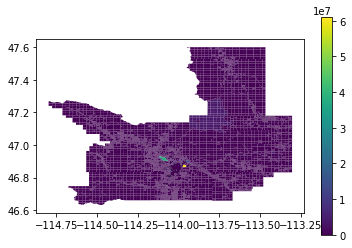

In [36]:
fig, ax = plt.subplots(1, 1)
plots.plot(column='TotalValue', ax=ax, legend=True)

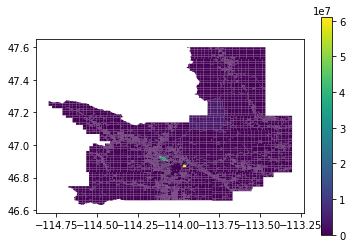

In [39]:
fig, ax = plt.subplots(1, 1)
plots.plot(column='TotalLandV', ax=ax, legend=True)

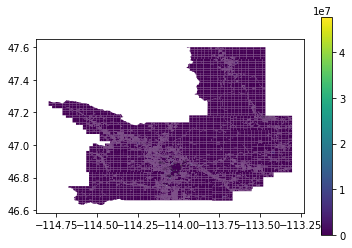

In [40]:
fig, ax = plt.subplots(1, 1)
plots.plot(column='TotalBuild', ax=ax, legend=True)

In [48]:
filtered_plots = plots[plots.TotalValue<1000000]

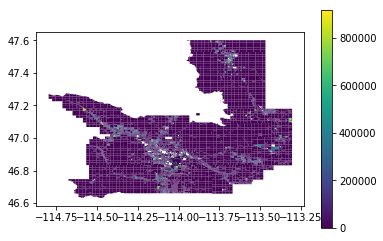

In [49]:
fig, ax = plt.subplots(1, 1)
filtered_plots.plot(column='TotalBuild', ax=ax, legend=True)